<a href="https://colab.research.google.com/github/silvi3110/sis-252-inteligencia-artificial/blob/main/OpenCV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Notebook 7: Transformaciones geométricas y perspectiva

# Importamos las librerías necesarias
import cv2  # Importamos OpenCV para procesamiento de imágenes
import numpy as np  # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt  # Importamos matplotlib para visualización
from google.colab.patches import cv2_imshow  # Importamos función para mostrar imágenes en Colab

In [2]:
# Cargar una imagen de ejemplo
from urllib.request import urlopen  # Para abrir URLs

# URL de una imagen de ejemplo
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png'
# Abrimos la URL y leemos los bytes de la imagen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga las imágenes en formato BGR, lo convertimos a RGB para visualización correcta
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# 1. Transformaciones básicas: traslación
# Definimos la matriz de traslación (mover 50 píxeles a la derecha, 30 píxeles hacia abajo)
M_translation = np.float32([[1, 0, 50], [0, 1, 30]])  # Matriz de 2x3
height, width = image.shape[:2]  # Obtenemos dimensiones de la imagen

In [4]:
# Aplicamos la traslación
translated_image = cv2.warpAffine(image_rgb, M_translation, (width, height))  # Dimensiones (ancho, alto)

In [5]:
# 2. Rotación
# Definimos el centro de rotación (centro de la imagen)
center = (width // 2, height // 2)  # Punto central de la imagen
# Definimos el ángulo de rotación (45 grados en sentido antihorario)
angle = 45
# Definimos el factor de escala (1.0 = sin cambio)
scale = 1.0
# Calculamos la matriz de rotación
M_rotation = cv2.getRotationMatrix2D(center, angle, scale)  # Matriz de 2x3
# Aplicamos la rotación
rotated_image = cv2.warpAffine(image_rgb, M_rotation, (width, height))  # Dimensiones (ancho, alto)

In [6]:
# 3. Escalado (Redimensionamiento)
# Redimensionamos a la mitad del tamaño original
fx, fy = 0.5, 0.5  # Factores de escala en x e y
# Aplicamos el escalado usando interpolación cúbica (mejor calidad)
scaled_image = cv2.resize(image_rgb, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)

In [7]:
# 4. Transformación afín (combina rotación, traslación y escala)
# Definimos tres puntos en la imagen original
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
# Definimos dónde queremos que vayan estos puntos
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
# Calculamos la matriz de transformación afín
M_affine = cv2.getAffineTransform(pts1, pts2)  # Matriz de 2x3
# Aplicamos la transformación
affine_image = cv2.warpAffine(image_rgb, M_affine, (width, height))

In [8]:
# 5. Transformación de perspectiva (proyección)
# Definimos cuatro puntos en la imagen original (un cuadrado)
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
# Definimos dónde queremos que vayan estos puntos (rectángulo)
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
# Calculamos la matriz de transformación de perspectiva
M_perspective = cv2.getPerspectiveTransform(pts1, pts2)  # Matriz de 3x3
# Aplicamos la transformación
perspective_image = cv2.warpPerspective(image_rgb, M_perspective, (300, 300))

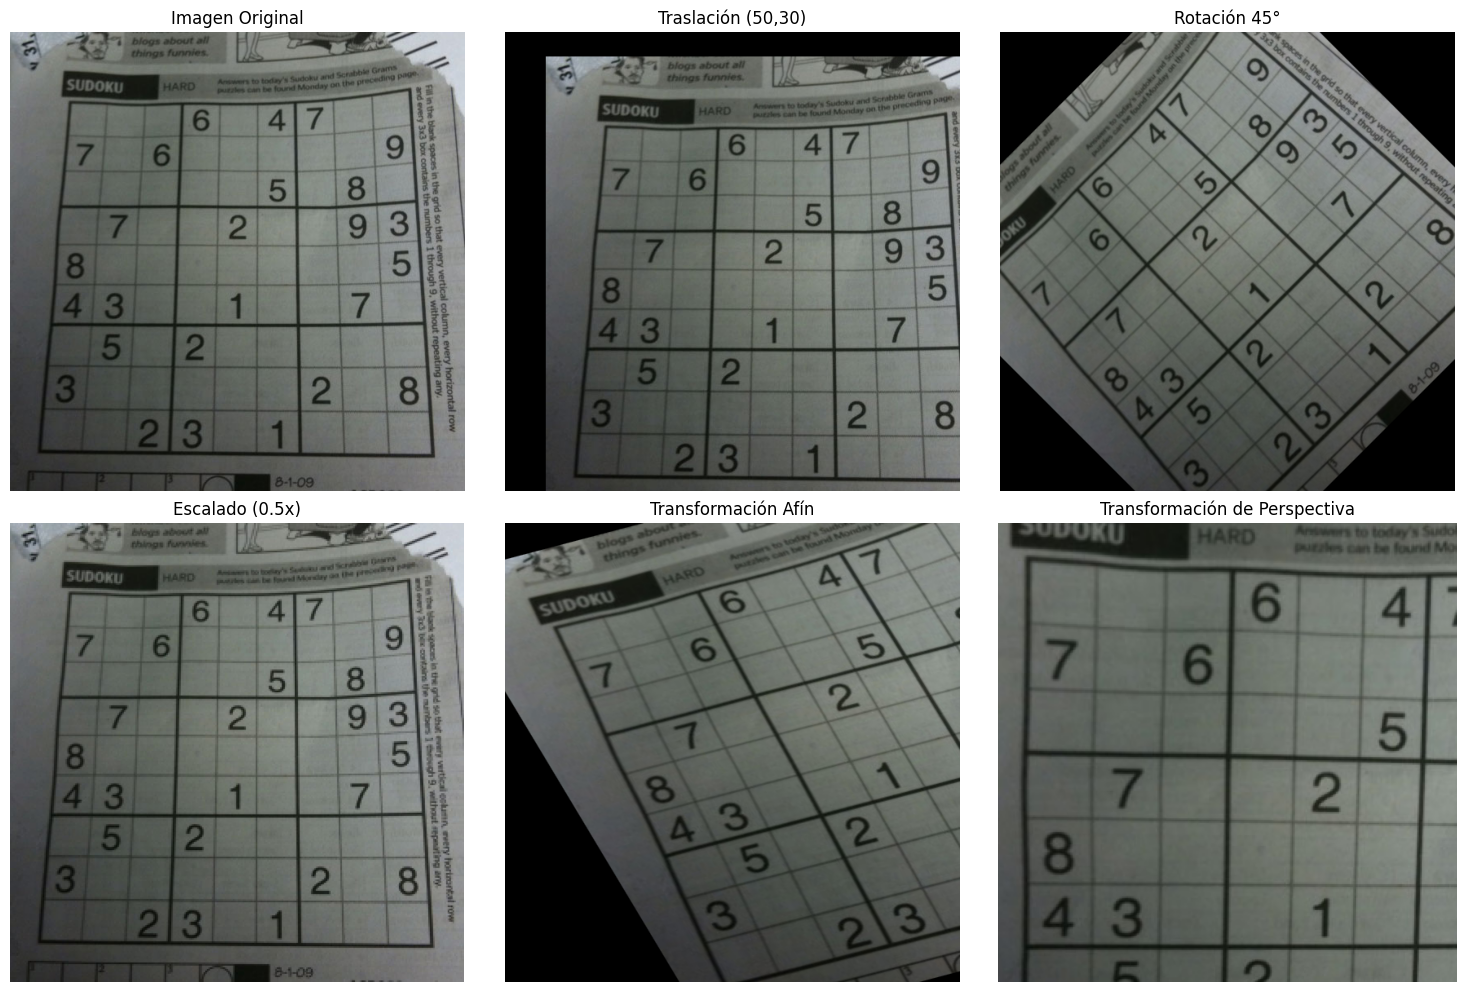

In [9]:
# 6. Visualización de los resultados
plt.figure(figsize=(15, 10))  # Creamos una figura con tamaño específico

# Imagen original
plt.subplot(2, 3, 1)  # Creamos un subplot en la posición 1
plt.title('Imagen Original')  # Añadimos un título
plt.imshow(image_rgb)  # Mostramos la imagen original
plt.axis('off')  # Ocultamos los ejes

# Imagen trasladada
plt.subplot(2, 3, 2)  # Creamos un subplot en la posición 2
plt.title('Traslación (50,30)')  # Añadimos un título
plt.imshow(translated_image)  # Mostramos la imagen trasladada
plt.axis('off')  # Ocultamos los ejes

# Imagen rotada
plt.subplot(2, 3, 3)  # Creamos un subplot en la posición 3
plt.title('Rotación 45°')  # Añadimos un título
plt.imshow(rotated_image)  # Mostramos la imagen rotada
plt.axis('off')  # Ocultamos los ejes

# Imagen escalada
plt.subplot(2, 3, 4)  # Creamos un subplot en la posición 4
plt.title('Escalado (0.5x)')  # Añadimos un título
plt.imshow(scaled_image)  # Mostramos la imagen escalada
plt.axis('off')  # Ocultamos los ejes

# Transformación afín
plt.subplot(2, 3, 5)  # Creamos un subplot en la posición 5
plt.title('Transformación Afín')  # Añadimos un título
plt.imshow(affine_image)  # Mostramos la imagen con transformación afín
plt.axis('off')  # Ocultamos los ejes

# Transformación de perspectiva
plt.subplot(2, 3, 6)  # Creamos un subplot en la posición 6
plt.title('Transformación de Perspectiva')  # Añadimos un título
plt.imshow(perspective_image)  # Mostramos la imagen con transformación de perspectiva
plt.axis('off')  # Ocultamos los ejes

plt.tight_layout()  # Ajustamos el layout para que no se superpongan los títulos
plt.show()  # Mostramos la figura completa

In [10]:
# 7. Información sobre las transformaciones
print("Transformaciones geométricas en OpenCV:")
print("1. Traslación: Desplaza la imagen usando una matriz de traslación [1,0,tx; 0,1,ty].")
print("2. Rotación: Gira la imagen alrededor de un punto usando ángulos en grados.")
print("3. Escalado: Cambia el tamaño de la imagen aplicando factores de escala.")
print("4. Transformación afín: Preserva líneas paralelas (usa 3 puntos).")
print("5. Transformación de perspectiva: Permite cambiar el punto de vista (usa 4 puntos).")
print("\nAplicaciones prácticas:")
print("- Corrección de distorsión de perspectiva en fotografías.")
print("- Rectificación de imágenes para OCR (Reconocimiento Óptico de Caracteres).")
print("- Mapeo de texturas en aplicaciones 3D.")
print("- Creación de efectos visuales como voltear páginas.")

Transformaciones geométricas en OpenCV:
1. Traslación: Desplaza la imagen usando una matriz de traslación [1,0,tx; 0,1,ty].
2. Rotación: Gira la imagen alrededor de un punto usando ángulos en grados.
3. Escalado: Cambia el tamaño de la imagen aplicando factores de escala.
4. Transformación afín: Preserva líneas paralelas (usa 3 puntos).
5. Transformación de perspectiva: Permite cambiar el punto de vista (usa 4 puntos).

Aplicaciones prácticas:
- Corrección de distorsión de perspectiva en fotografías.
- Rectificación de imágenes para OCR (Reconocimiento Óptico de Caracteres).
- Mapeo de texturas en aplicaciones 3D.
- Creación de efectos visuales como voltear páginas.
